# **Predicting Diabetes Onset**
**Project Overview:** The "Predicting Diabetes Onset" project aims to build a machine learning model that predicts whether an individual has diabetes based on various health-related features. The dataset used for this project includes attributes related to medical history and physical measurements.

**Dataset Description:** The dataset consists of the following features:

**1  Pregnancies:** Number of pregnancies.

**2 Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

**3 BloodPressure:** Diastolic blood pressure (mm Hg).

**4 SkinThickness:** Triceps skin fold thickness (mm).

**5 Insulin:** 2-Hour serum insulin (mu U/ml).
**6 BMI:** Body mass index (weight in kg/(height in m)^2).

**7 DiabetesPedigreeFunction:** Diabetes pedigree function which provides a measure of likelihood of diabetes based on family history.

**8 Age:** Age of the individual (years).
Outcome: Class label indicating whether the individual has diabetes (1) or not (0).
## **Models Used:**

**GaussianNB**: A Naive Bayes classifier assuming normal distribution of features.

**DecisionTreeClassifier:** A decision tree classifier for making decisions based on feature values.

**RandomForestClassifier:** An ensemble method using multiple decision trees to improve prediction accuracy.

**LogisticRegression:** A regression model used for binary classification.

**AdaBoostClassifier:** An ensemble technique that combines weak classifiers to create a strong classifier.

**XGBClassifier:** An optimized gradient boosting model.
**SVC:** Support Vector Classification, a powerful classification method.

**GradientBoostingClassifier:** Another boosting technique that improves model performance.
**Neural Network:** A deep learning model to capture complex patterns in the data.

## **import Libraries**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## **Load Dataset**

In [47]:
raw_data = pd.read_csv('diabetes.csv')
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df = raw_data.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Data Cleaning and preprocessing**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
## EDA

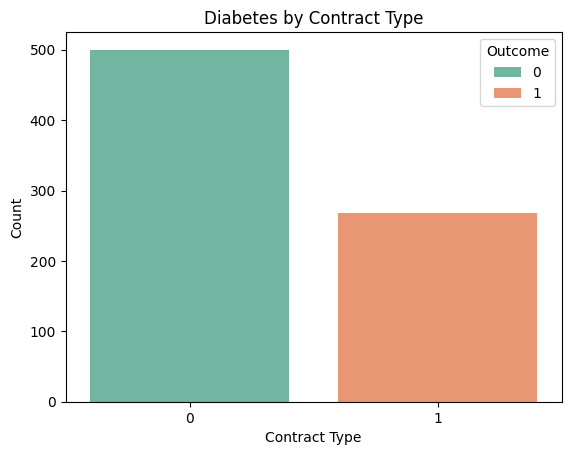

In [53]:
sns.countplot(x= 'Outcome', hue = 'Outcome',data=df,palette = 'Set2')
plt.title('Diabetes by Contract Type')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.show()

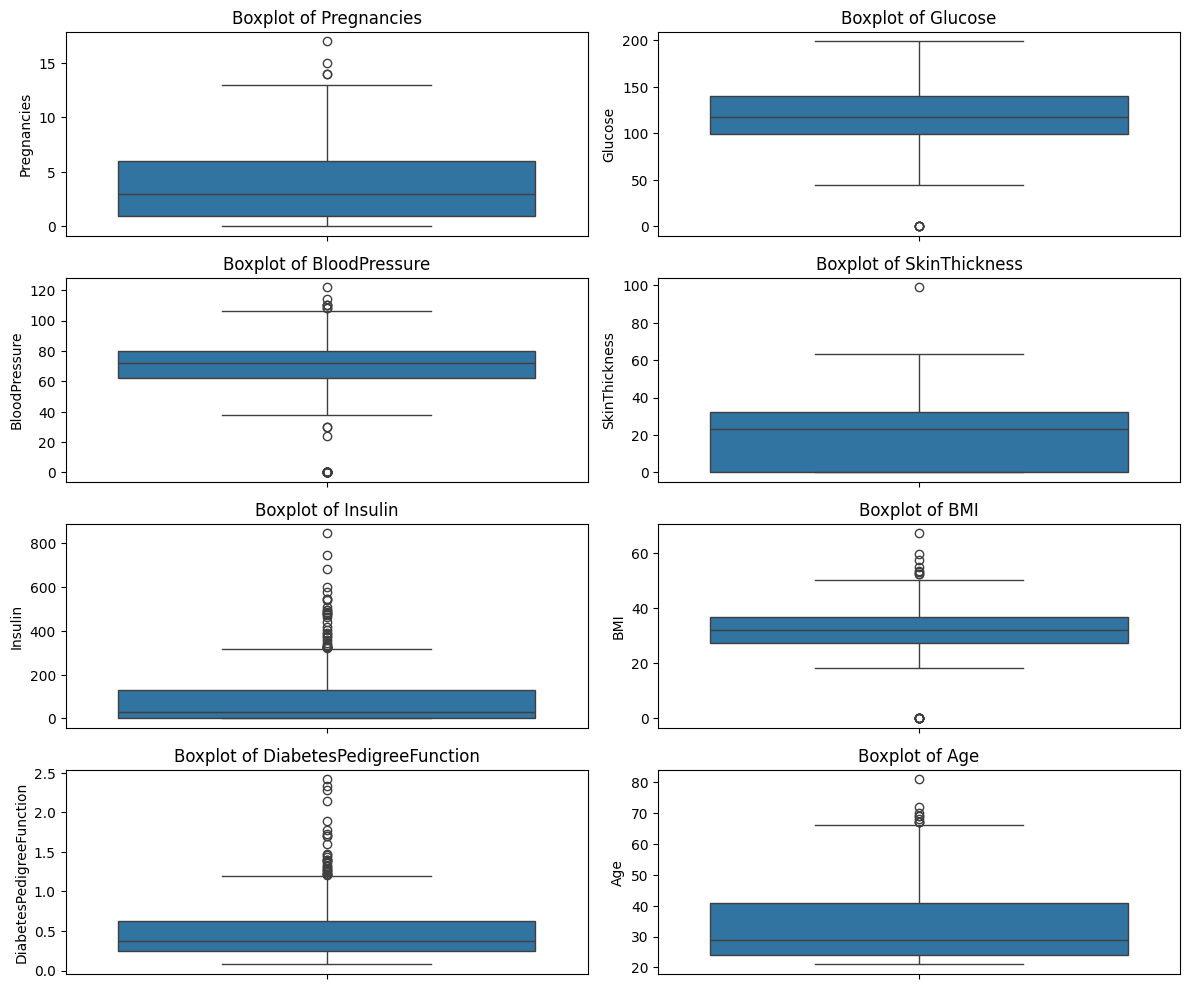

In [54]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Draw a boxplot for each feature in cols
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')

# Adjust the layout
plt.tight_layout()
plt.show()


In [55]:
## Outlier of Insulin
Insulin_q1 = df['Insulin'].quantile(0.25)
Insulin_q3 = df['Insulin'].quantile(0.75)

iqr = Insulin_q3-Insulin_q1

Insulin_lower_bound = Insulin_q1-1.5*iqr
Insulin_upper_bound = Insulin_q3+1.5*iqr

df= df[(df['Insulin']>=Insulin_lower_bound)& (df['Insulin']<=Insulin_upper_bound)]


## Outlier of SkinThickness
SkinThickness_q1 = df['SkinThickness'].quantile(0.25)
SkinThickness_q3 = df['SkinThickness'].quantile(0.75)

SkinThickness_iqr = SkinThickness_q3-SkinThickness_q1

SkinThickness_lower_bound = SkinThickness_q1-1.5*SkinThickness_iqr
SkinThickness_upper_bound = SkinThickness_q3+1.5*SkinThickness_iqr

df= df[(df['SkinThickness']>=SkinThickness_lower_bound)& (df['SkinThickness']<=SkinThickness_upper_bound)]


## Outlier of BMI
BMI_q1 = df['BMI'].quantile(0.25)
BMI_q3 = df['BMI'].quantile(0.75)

BMI_iqr = BMI_q3-BMI_q1

BMI_lower_bound = BMI_q1-1.5*BMI_iqr
BMI_upper_bound = BMI_q3+1.5*BMI_iqr

df= df[(df['BMI']>=BMI_lower_bound)& (df['BMI']<=BMI_upper_bound)]


## DiabetesPedigreeFunction

DiabetesPedigreeFunction_q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
DiabetesPedigreeFunction_q3 = df['DiabetesPedigreeFunction'].quantile(0.75)

DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_q3-DiabetesPedigreeFunction_q1

DiabetesPedigreeFunction_lower_bound = DiabetesPedigreeFunction_q1-1.5*DiabetesPedigreeFunction_iqr
DiabetesPedigreeFunction_upper_bound = DiabetesPedigreeFunction_q3+1.5*DiabetesPedigreeFunction_iqr

df= df[(df['DiabetesPedigreeFunction']>=DiabetesPedigreeFunction_lower_bound)& (df['DiabetesPedigreeFunction']<=DiabetesPedigreeFunction_upper_bound)]


## Pregnancies

Pregnancies_q1 = df['Pregnancies'].quantile(0.25)
Pregnancies_q3 = df['Pregnancies'].quantile(0.75)

Pregnancies_iqr = Pregnancies_q3-Pregnancies_q1

Pregnancies_lower_bound = Pregnancies_q1-1.5*Pregnancies_iqr
Pregnancies_upper_bound = Pregnancies_q3+1.5*Pregnancies_iqr

Pregnancies_df= df[(df['Pregnancies']>=Pregnancies_lower_bound)& (df['Pregnancies']<=Pregnancies_upper_bound)]


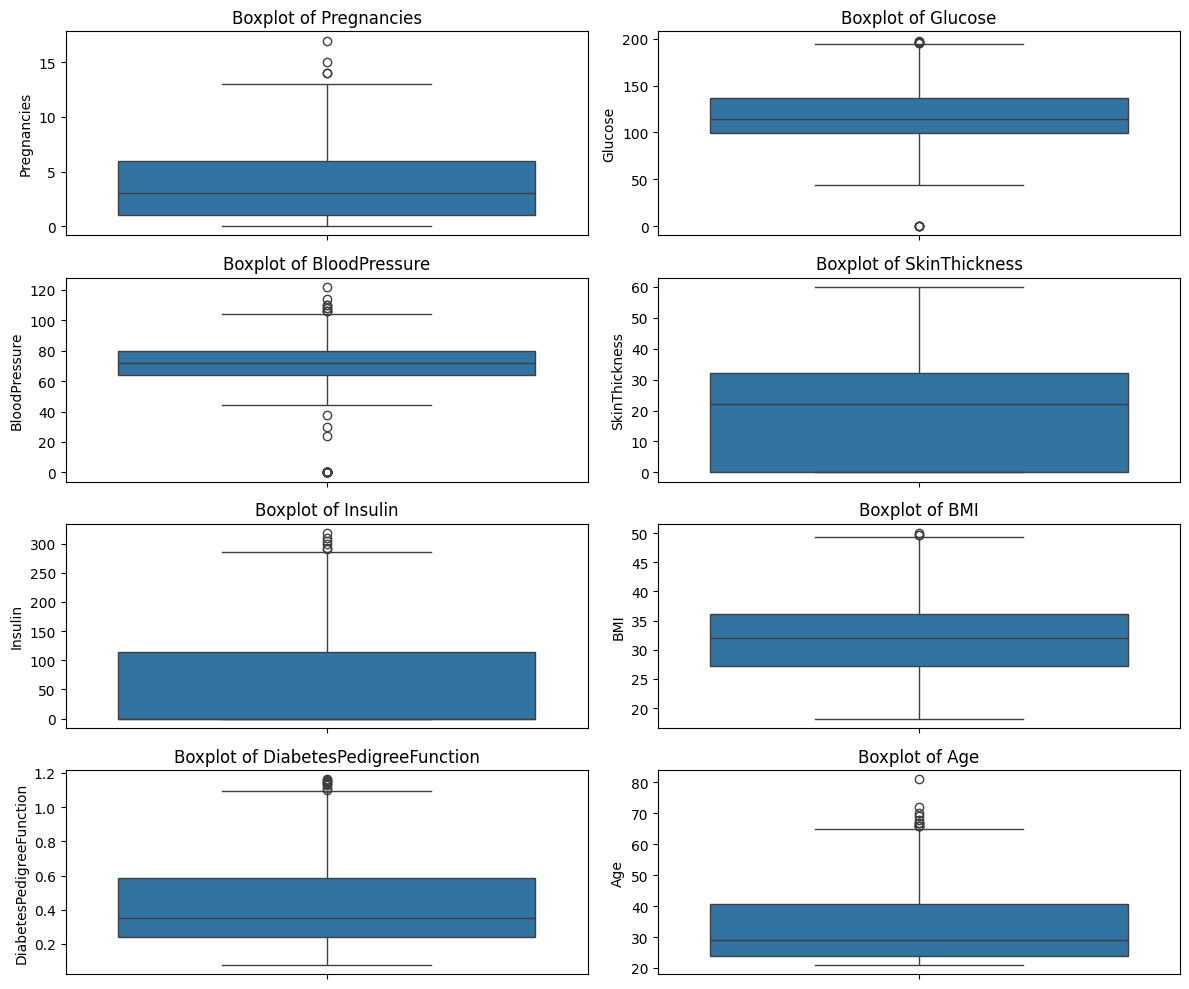

In [56]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Draw a boxplot for each feature in cols
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')

# Adjust the layout
plt.tight_layout()
plt.show()


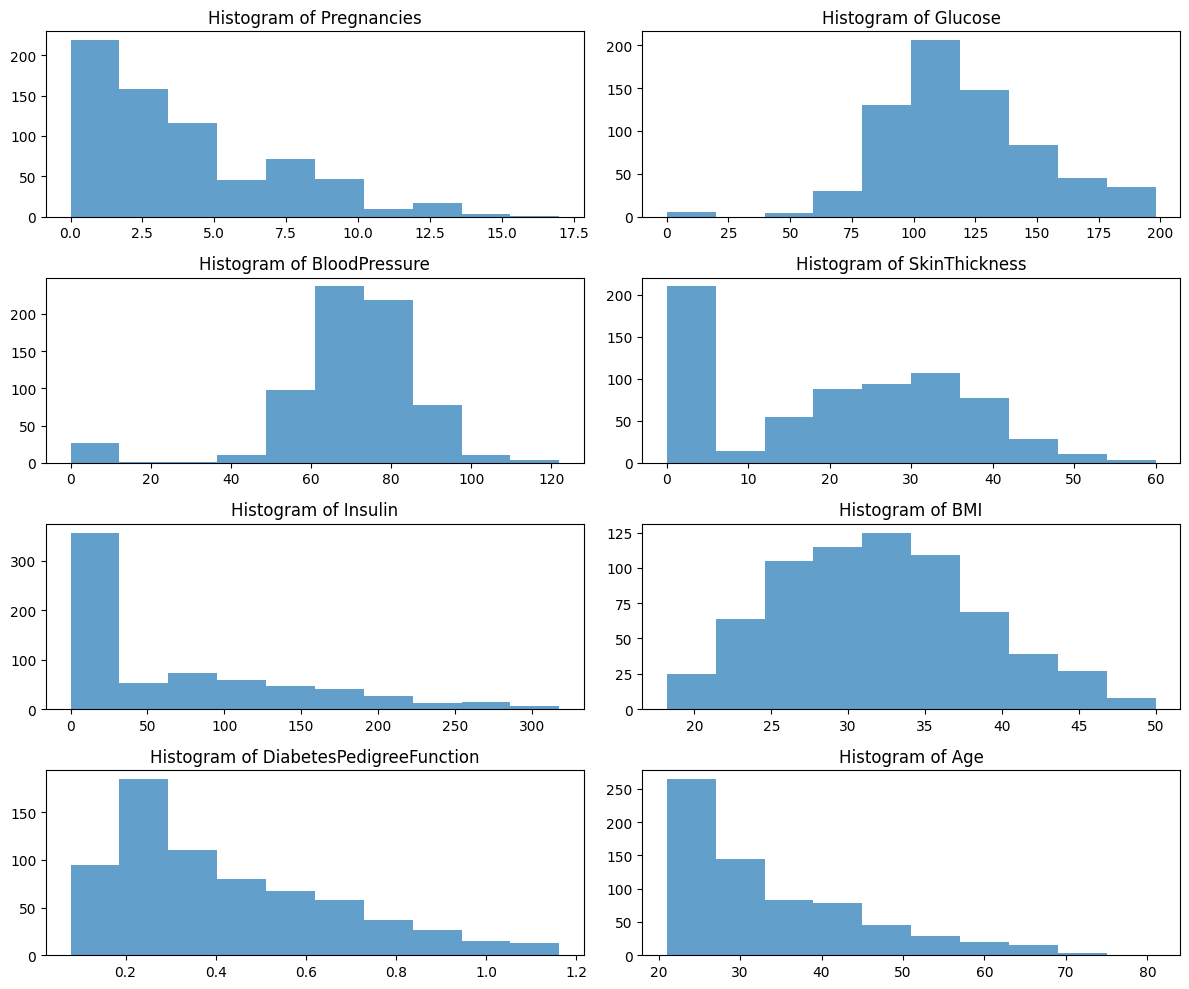

In [57]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
ax=ax.flatten()
for i,col in enumerate(cols):
  ax[i].hist(df[col],alpha =0.7)
  ax[i].set_title(f'Histogram of {col}')
plt.tight_layout()

plt.show()

In [58]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## **Feature Selection**

In [59]:
X=df.drop('Outcome',axis =1)
y=df["Outcome"]

In [60]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((548, 8), (138, 8), (548,), (138,))

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Model**

In [63]:
## Classification Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


In [65]:
models = [
     LogisticRegression(random_state = 50),
     RandomForestClassifier(),
     DecisionTreeClassifier(random_state=42),
     AdaBoostClassifier(),
     GradientBoostingClassifier(random_state= 42),
     SVC(random_state = 42),
     GaussianNB()
]


for i,model in enumerate(models):
  model.fit(X_train,y_train)
  train_accuracy = accuracy_score(y_train,model.predict(X_train))
  test_accuracy = accuracy_score(y_test,model.predict(X_test))
  print(f"Model {i+1}: {type(model).__name__}")
  print(f"Train accuracy:{train_accuracy}")
  print(f"Test accuracy {test_accuracy}:.2f")
  print("_"*50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1: LogisticRegression
Train accuracy:0.7992700729927007
Test accuracy 0.7681159420289855:.2f
__________________________________________________
Model 2: RandomForestClassifier
Train accuracy:1.0
Test accuracy 0.7681159420289855:.2f
__________________________________________________
Model 3: DecisionTreeClassifier
Train accuracy:1.0
Test accuracy 0.7101449275362319:.2f
__________________________________________________
Model 4: AdaBoostClassifier
Train accuracy:0.8394160583941606
Test accuracy 0.7681159420289855:.2f
__________________________________________________
Model 5: GradientBoostingClassifier
Train accuracy:0.9324817518248175
Test accuracy 0.7753623188405797:.2f
__________________________________________________
Model 6: SVC
Train accuracy:0.791970802919708
Test accuracy 0.7246376811594203:.2f
__________________________________________________
Model 7: GaussianNB
Train accuracy:0.7664233576642335
Test accuracy 0.7753623188405797:.2f
_______________________________________

Model: GaussianNB


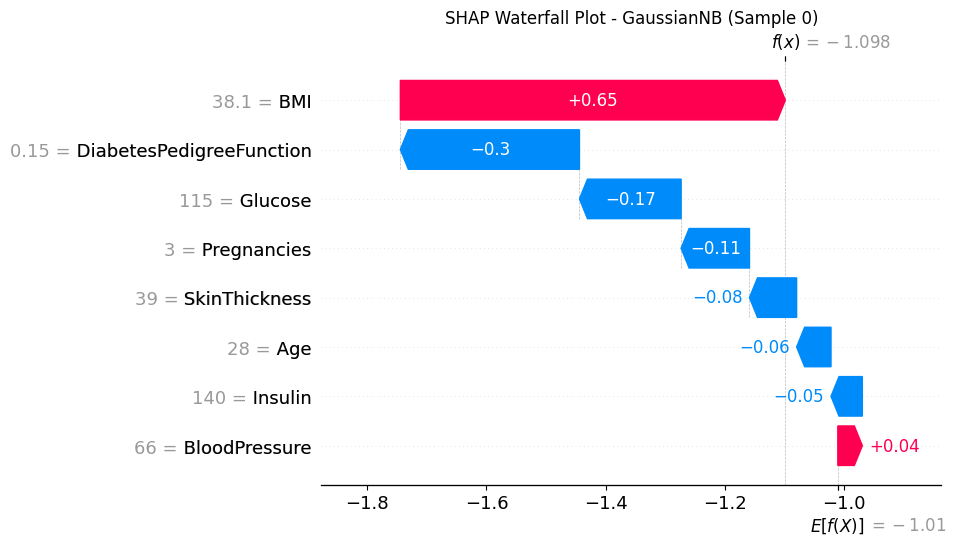

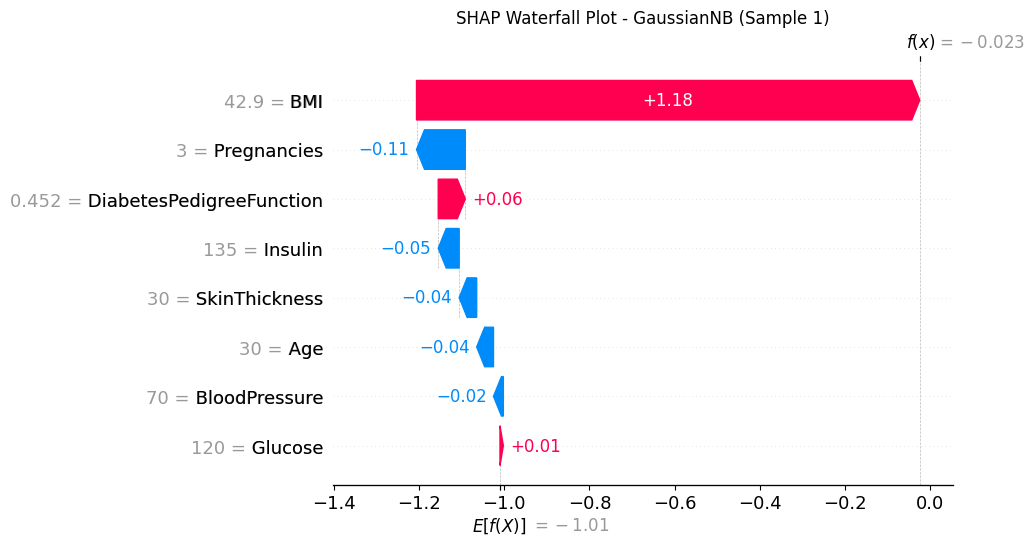

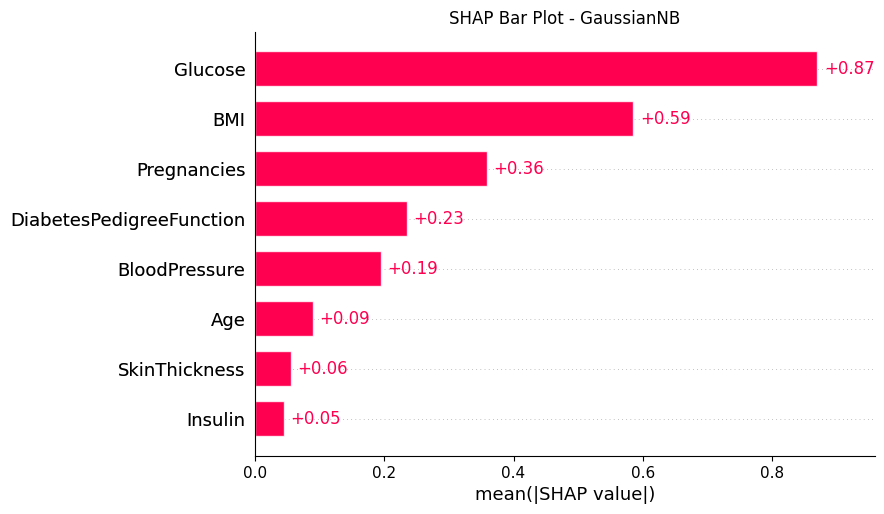

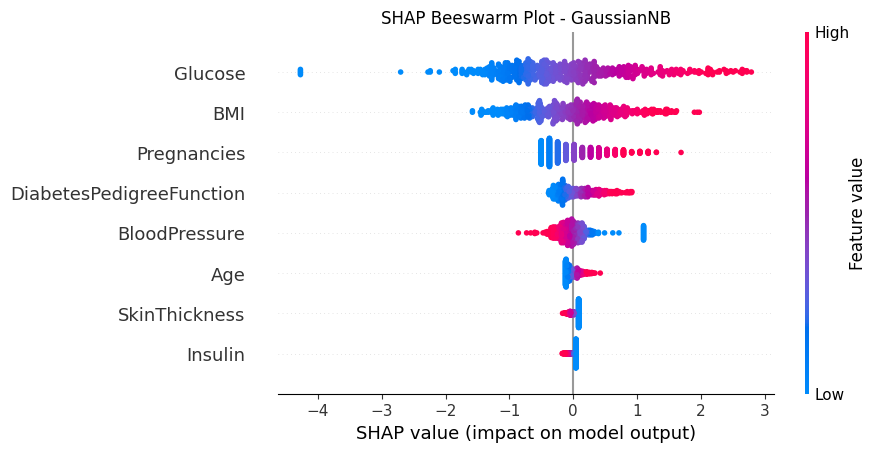

 99%|===================| 1085/1096 [00:15<00:00]       

The model DecisionTreeClassifier is not compatible with SHAP: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.130000, while the model output was 0.120000. If this difference is acceptable you can set check_additivity=False to disable this check.
Model: RandomForestClassifier
The model RandomForestClassifier is not compatible with SHAP: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (8, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.
The model LogisticRegression is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: AdaBoostClassi

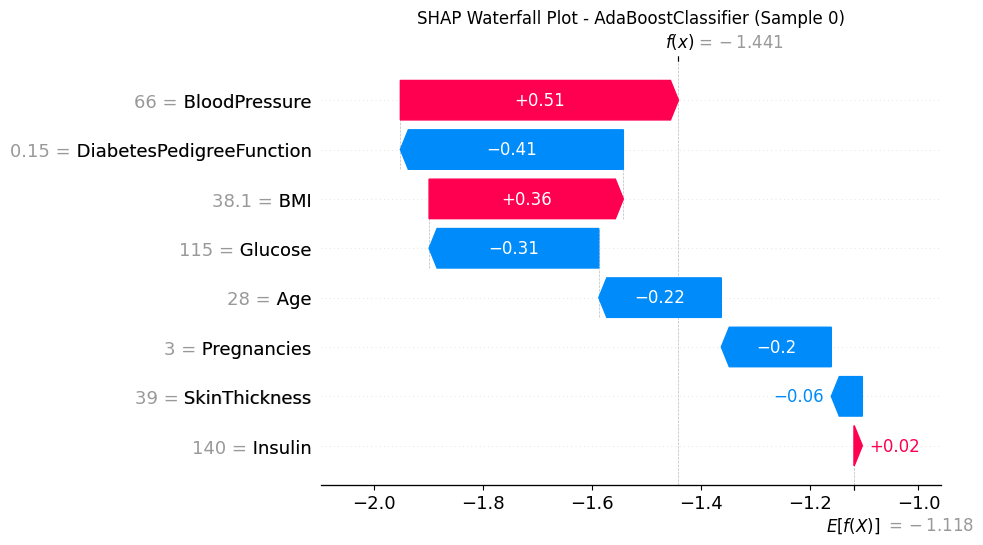

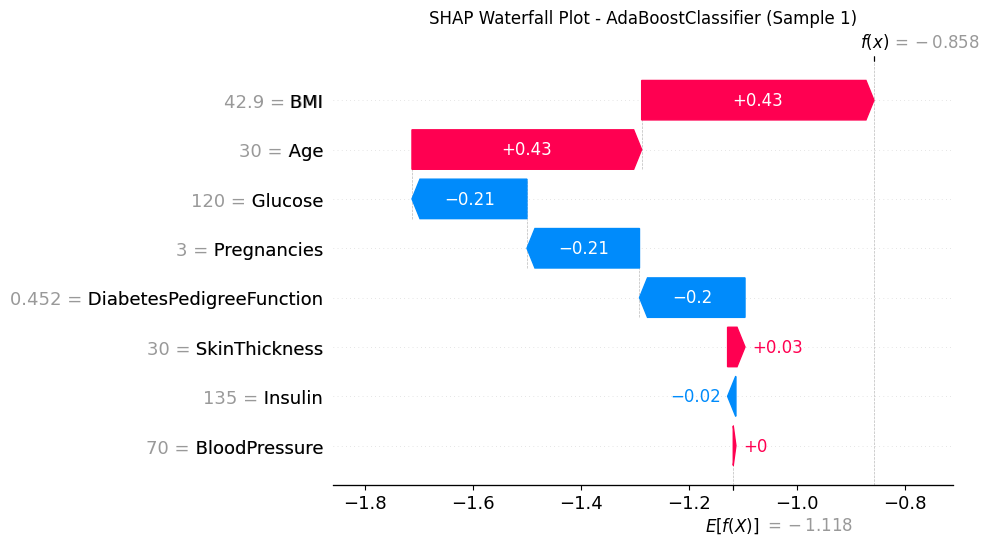

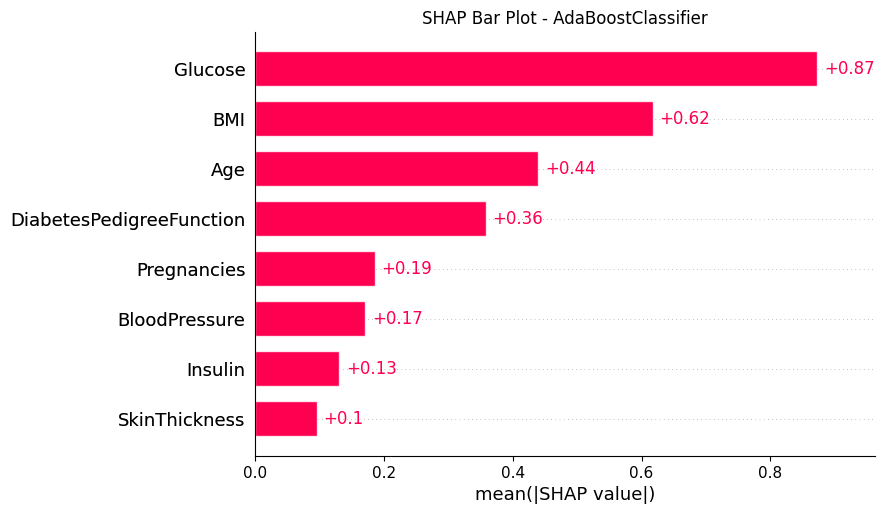

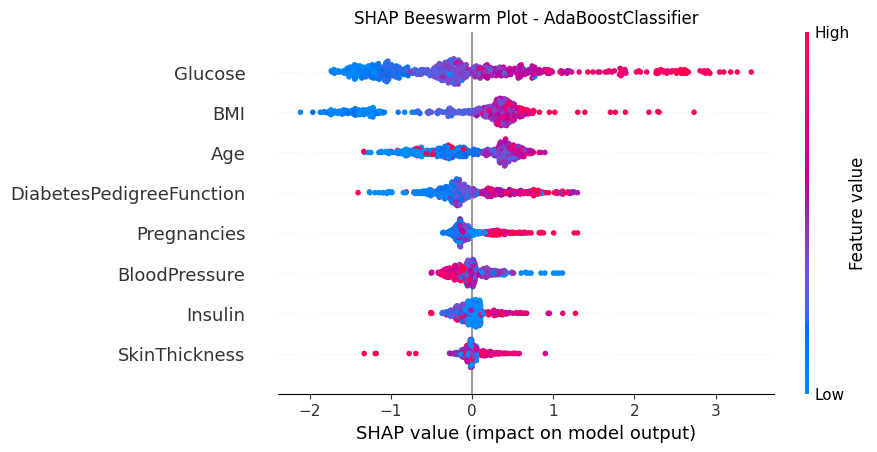

The model XGBClassifier is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC(random_state=42)
The model SVC is not compatible with SHAP: The passed model is not callable and cannot be analyzed directly with the given masker! Model: GaussianNB()


In [70]:
import shap

# Create a list of model names corresponding to the order of the models
model_names = [
    "GaussianNB",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "LogisticRegression",
    "AdaBoostClassifier",
    "XGBClassifier",
    "SVC",
    "GradientBoostingClassifier",
]

# Creating an explainer object and calculating SHAP values for each model
for i, model in enumerate(models):
    model_name = model_names[i]
    try:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train[:1000])

        # Generate SHAP plots
        print(f"Model: {model_name}")

        # Waterfall plot for the first sample
        shap.plots.waterfall(shap_values[0], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 0)")
        plt.show()

        # Waterfall plot for the second sample
        shap.plots.waterfall(shap_values[1], show=False)
        plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 1)")
        plt.show()

        # Bar plot for average SHAP values
        shap.plots.bar(shap_values, show=False)
        plt.title(f"SHAP Bar Plot - {model_name}")
        plt.show()

        # Beeswarm plot to visualize the distribution of SHAP values
        shap.plots.beeswarm(shap_values, show=False)
        plt.title(f"SHAP Beeswarm Plot - {model_name}")
        plt.show()
    except Exception as e:
        print(f"The model {model_name} is not compatible with SHAP: {e}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


## **Neural Network**

## **Load Database**

In [72]:
df1= pd.read_csv("diabetes.csv")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Preprocessing and Cleaning**

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["Outcome"]=le.fit_transform(df1['Outcome'])
df1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Feature Selection**





In [77]:
X= df1.drop("Outcome",axis=1)
y=df1['Outcome']

In [79]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [80]:
## Standarization

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

##  **Neural Network Model**

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets,layers,models

In [89]:
from re import L
model = Sequential([
    layers.Dense(32,input_dim = X_train.shape[1],activation ="relu"),
    layers.Dense(16,activation ="relu"),
    layers.Dense(16,activation ='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [93]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,105 (4.32 KB)

 Trainable params: 1,105 (4.32 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history = model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6656 - loss: 0.6332 - val_accuracy: 0.6299 - val_loss: 0.6287
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.5852 - val_accuracy: 0.6364 - val_loss: 0.5970
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7034 - loss: 0.5426 - val_accuracy: 0.6948 - val_loss: 0.5759
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7235 - loss: 0.5231 - val_accuracy: 0.7208 - val_loss: 0.5506
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7607 - loss: 0.5087 - val_accuracy: 0.7208 - val_loss: 0.5290
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.4912 - val_accuracy: 0.7338 - val_loss: 0.5206
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7711 - loss: 0.4611 - val_accuracy: 0.7403 - val_loss: 0.5130
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7673 - loss: 0.4555 - val_accuracy: 0.7532 - 

In [99]:
Prediction =model.predict(X_test)
Prediction = (Prediction > 0.5).astype("int32")

accuracy= accuracy_score(y_test,Prediction)
print(f"Accuracy Neural Network :{accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy Neural Network :0.7077922077922078
